https://pytorch.org/docs/stable/nn.html

In [0]:
!pip install Pillow==4.0.0
!pip install torch==0.4.1
!pip install torchvision==0.2.1

    100% |████████████████████████████████| 519.5MB 35kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58a2a000 @  0x7f5ce6ab61c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 7.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 第2章　torch.nnパッケージ

#畳み込みレイヤー


## Conv1d,Conv2d,Conv3dを使用する


In [0]:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

In [0]:
# 正方形のカーネル、縦横ストライドが同じ
m = nn.Conv2d(16, 33, kernel_size=3, stride=2)
# 非正方形のカーネルと不均等なストライドとパディング
m = nn.Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))
# 非正方形のカーネルと不均等なストライドとパディングとdilation
m = nn.Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)

In [0]:
# 正方形のカーネル、縦横ストライドが同じ
m = nn.Conv3d(16, 33, 3, stride=2)
# 非正方形のカーネルと不均等なストライドとパディング
m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output = m(input)

# 1次元転置畳み込み

逆畳み込みとも呼ばれる。特徴マップをアップサンプリングする。


複数の入力面で構成される入力画像に1Dの転置畳み込み演算子を適用します。 このモジュールは、入力に対するConv1dの勾配と見ることができます。これは分数ストライド畳み込みまたはデコンボリューションとも呼ばれます（実際のデコンボリューション演算ではありません）。


```
class torch.nn.ConvTranspose1d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```


# 2次元転置畳み込み

fractionally-strided convolution or a deconvolution（実際はデコンボリューション演算ではない。）
アップサンプリング（nn.Upsample）と違い重みとバイアスがある。


ConvTとUpsample+Convの違い

https://qiita.com/phyblas/items/3b999debd487aaabfc12



```
Input: (N,Cin,Hin,Win)
```



```
class torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```


in_channels：入力画像のチャンネル数    
out_channels：畳み込みによって生成されるチャネルの数    
kernel_size：畳み込みカーネルのサイズ    
stride：畳み込みのストライド。デフォルト：1    
padding：kernel_size - 1 - パディングゼロパディングが入力の各次元の両側に追加されます。デフォルト：0    
output_padding：出力形状の片側に追加される追加のサイズを制御。デフォルト：0    
groups：入力チャネルから出力チャネルへのブロックされた接続の数。デフォルト：1    
bias：Trueの場合、学習可能なバイアスを出力に追加します。デフォルト：True    
dilation：カーネル要素間の間隔。デフォルト：1    

    
        

~~
stride：相互相関のストライドを制御    
padding：kernel_size - 1 - パッディングのポイント数に対する両側の暗黙のゼロパディングの量を制御します。    
output_padding：出力形状の片側に追加される追加のサイズを制御    
dilation：カーネルポイント間の間隔を制御    
groups：入力と出力の間の接続を制御    
~~



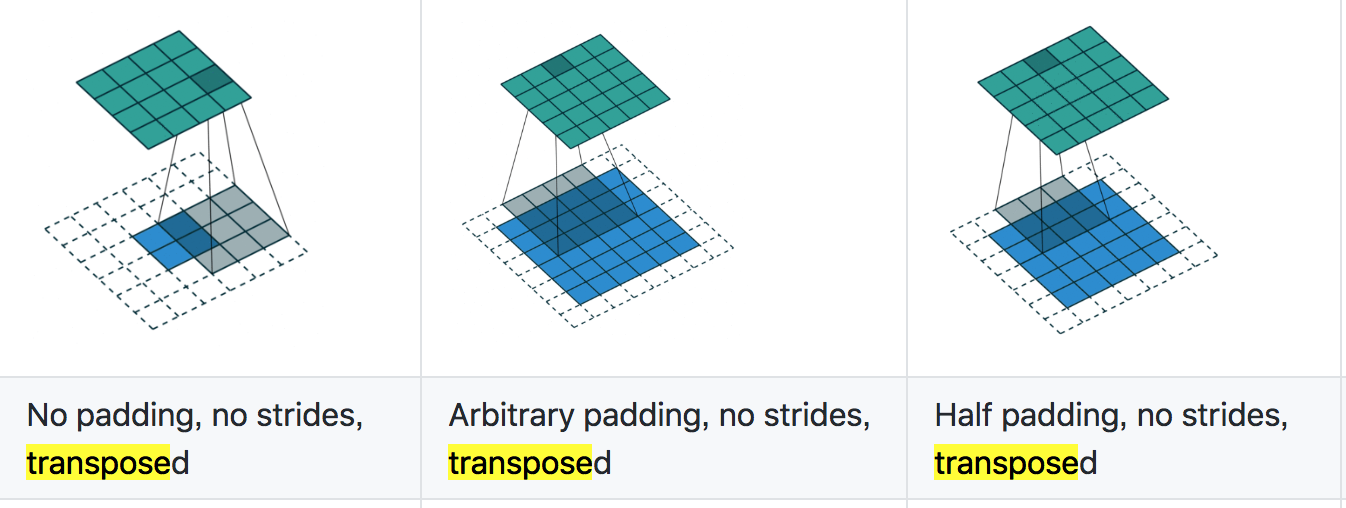

https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

均一な値と不均一なデータを設定できる。

In [0]:
input = torch.randn(20, 16, 5, 6)
# 正方形のカーネル、縦横ストライドが同じ
m = nn.ConvTranspose2d(16, 33, kernel_size=3, stride=2)
print(m(input).shape)
# 非正方形のカーネルと不均等なストライドとパディング
m = nn.ConvTranspose2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))
print(m(input).shape)

torch.Size([20, 33, 11, 13])
torch.Size([20, 33, 3, 6])


In [0]:
input = torch.randn(20, 16, 50, 100)
output = m(input)
print(output.shape)

torch.Size([20, 33, 93, 100])


In [0]:
# 正確な出力サイズを引数として指定することもできます
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
h = downsample(input)
print("downsample："+str(h.size()))
#アップサンプルの出力サイズに入力のサイズを入れた例
output = upsample(h, output_size=input.size())
print("upsample："+str(output.size()))

downsample：torch.Size([1, 16, 6, 6])
upsample：torch.Size([1, 16, 12, 12])


# 3次元転置畳み込み

```
class torch.nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```

## MaxPool1d,MaxPool2d,MaxPool3dを使用する



In [0]:
# pool of size=3, stride=2
m = nn.MaxPool1d(3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

print(input.shape)
print(output.shape)

torch.Size([20, 16, 50])
torch.Size([20, 16, 24])


In [0]:
# pool with window of size=3, stride=1
m = nn.MaxPool1d(3, stride=1)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[ 3.,  4.,  5.,  6.,  7.]]])

In [0]:
# pool with window of size=3, stride=2
m = nn.MaxPool1d(3, stride=2)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[ 3.,  5.,  7.]]])

In [0]:
# サイズの正方形のカーネル= 3、ストライド= 2
m = nn.MaxPool2d(3, stride=2)
# 非正方形のカーネル
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(input)
print(input.shape)

torch.Size([20, 16, 50, 32])


In [0]:
# サイズの正方形のカーネル= 3、ストライド= 2
m = nn.MaxPool3d(3, stride=2)
# 非正方形のカーネル
m = nn.MaxPool3d((3, 2, 2), stride=(2, 1, 2))
input = torch.randn(20, 16, 50,44, 31)
output = m(input)
print(input.shape)

torch.Size([20, 16, 50, 44, 31])


## AvgPool1d~AvgPool3dを使用する

In [1]:
# pool with window of size=3, stride=2
m = nn.AvgPool1d(3, stride=2)
output = m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

NameError: ignored

In [0]:
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(input)

In [0]:
# pool of square window of size=3, stride=2
m = nn.AvgPool3d(3, stride=2)
# pool of non-square window
m = nn.AvgPool3d((3, 2, 2), stride=(2, 1, 2))
input = torch.randn(20, 16, 50,44, 31)
output = m(input)

## AdaptiveMaxPool1d〜AdaptiveMaxPool3dを使用する

In [0]:
# 目標出力サイズ5
m = nn.AdaptiveMaxPool1d(5)
input = torch.randn(1, 64, 8)
output = m(input)

print(output.shape)

torch.Size([1, 64, 5])


In [0]:
# 目標出力サイズは5x7
m = nn.AdaptiveMaxPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)

print(output.size())

# 目標出力サイズは7×7（平方）
m = nn.AdaptiveMaxPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)

print(output.size())

# target output size of 10x7
# m = nn.AdaptiveMaxPool2d((None, 7))
# input = torch.randn(1, 64, 10, 9)
# output = m(input)


torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 7, 7])


In [0]:
# 目標出力サイズは 5x7x9
m = nn.AdaptiveMaxPool3d((5,7,9))
input = torch.randn(1, 64, 8, 9, 10)
output = m(input)
# 目標出力サイズは7x7x7 (立方体)
m = nn.AdaptiveMaxPool3d(7)
input = torch.randn(1, 64, 10, 9, 8)
output = m(input)
# target output size of 7x9x8
# m = nn.AdaptiveMaxPool3d((7, None, None))
# input = torch.randn(1, 64, 10, 9, 8)
# output = m(input)

## AdaptiveAvgPool1d〜AdaptiveAvgPool3dを使用する

In [0]:
# 目標出力サイズ5
m = nn.AdaptiveAvgPool1d(5)
input = torch.randn(1, 64, 8)
output = m(input)

In [0]:
# ターゲット出力サイズは5x7
m = nn.AdaptiveAvgPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
# 目標出力サイズは7×7（平方）
m = nn.AdaptiveAvgPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)
# target output size of 10x7
# m = nn.AdaptiveMaxPool2d((None, 7))
# input = torch.randn(1, 64, 10, 9)
# output = m(input)

In [0]:
# ターゲット出力サイズは5x7x9
m = nn.AdaptiveAvgPool3d((5,7,9))
input = torch.randn(1, 64, 8, 9, 10)
output = m(input)
# ターゲット出力サイズは7x7x7（立方体）
m = nn.AdaptiveAvgPool3d(7)
input = torch.randn(1, 64, 10, 9, 8)
output = m(input)
# target output size of 7x9x8
# m = nn.AdaptiveMaxPool3d((7, None, None))
# input = torch.randn(1, 64, 10, 9, 8)
# output = m(input)

## 入力境界の反映を使用して入力１次元〜２次元テンソルをパディングする


In [0]:
m = nn.ReflectionPad1d(2)
input = torch.arange(8).reshape(1, 2, 4)
input

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]]])

In [0]:
m(input)

tensor([[[ 2.,  1.,  0.,  1.,  2.,  3.,  2.,  1.],
         [ 6.,  5.,  4.,  5.,  6.,  7.,  6.,  5.]]])

In [0]:
# 異なるパディングを使用
m = nn.ReflectionPad1d((3, 1))
m(input)

tensor([[[ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  2.],
         [ 7.,  6.,  5.,  4.,  5.,  6.,  7.,  6.]]])

In [0]:
m = nn.ReflectionPad1d(2)
input = torch.arange(10).reshape(1, 2, 5)
input

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]]])

In [0]:
m = nn.ReflectionPad2d(2)
input = torch.arange(9).reshape(1, 1, 3, 3)
input

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]]]])

In [0]:
m(input)

tensor([[[[ 8.,  7.,  6.,  7.,  8.,  7.,  6.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 2.,  1.,  0.,  1.,  2.,  1.,  0.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 8.,  7.,  6.,  7.,  8.,  7.,  6.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 2.,  1.,  0.,  1.,  2.,  1.,  0.]]]])

In [0]:
# 異なるパディングを使用
m = nn.ReflectionPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 7.,  6.,  7.,  8.,  7.],
          [ 4.,  3.,  4.,  5.,  4.],
          [ 1.,  0.,  1.,  2.,  1.],
          [ 4.,  3.,  4.,  5.,  4.],
          [ 7.,  6.,  7.,  8.,  7.]]]])

## 入力境界の複製を使用して入力1次元〜２次元テンソルをパディング


In [0]:
m = nn.ReplicationPad1d(2)
input = torch.arange(8).reshape(1, 2, 4)
input

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]]])

In [0]:
m(input)

tensor([[[ 0.,  0.,  0.,  1.,  2.,  3.,  3.,  3.],
         [ 4.,  4.,  4.,  5.,  6.,  7.,  7.,  7.]]])

In [0]:
# 異なるパディングを使用
m = nn.ReplicationPad1d((3, 1))
m(input)

tensor([[[ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  3.],
         [ 4.,  4.,  4.,  4.,  5.,  6.,  7.,  7.]]])

In [0]:
m = nn.ReplicationPad2d(2)
input = torch.arange(9).reshape(1, 1, 3, 3)
input

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]]]])

In [0]:
m(input)

tensor([[[[ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 3.,  3.,  3.,  4.,  5.,  5.,  5.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.]]]])

In [0]:
# 異なるパディングを使用
m = nn.ReplicationPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 0.,  0.,  1.,  2.,  2.],
          [ 0.,  0.,  1.,  2.,  2.],
          [ 0.,  0.,  1.,  2.,  2.],
          [ 3.,  3.,  4.,  5.,  5.],
          [ 6.,  6.,  7.,  8.,  8.]]]])

## 入力されたテンソル境界をゼロで埋める


In [0]:
#1のパディングが全ての境界に入る。
m = nn.ZeroPad2d(1)
input = torch.randn(1, 1, 3, 3)
input

tensor([[[[ 0.5513,  0.3681, -0.7933],
          [ 0.0940,  0.8000,  2.5983],
          [ 0.4379, -2.5933, -0.7049]]]])

In [0]:
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.5513,  0.3681, -0.7933,  0.0000],
          [ 0.0000,  0.0940,  0.8000,  2.5983,  0.0000],
          [ 0.0000,  0.4379, -2.5933, -0.7049,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

In [0]:
#異なるパディングを境界に適応する。
m = nn.ZeroPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.5513,  0.3681, -0.7933,  0.0000],
          [ 0.0000,  0.0940,  0.8000,  2.5983,  0.0000],
          [ 0.0000,  0.4379, -2.5933, -0.7049,  0.0000]]]])